In [1]:
# CELL 1: IMPORTS & SETUP

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

# Create results directory
os.makedirs('../results', exist_ok=True)

# Plot styling
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
sns.set_style('whitegrid')
sns.set_palette('husl')

print(' All libraries imported successfully!')
print(f'NumPy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

 All libraries imported successfully!
NumPy: 2.3.5
Pandas: 2.3.3


In [2]:
# CELL 2: BUSINESS CONTEXT SUMMARY

print('=' * 65)
print('    BUSINESS CONTEXT — CREDIT CARD FRAUD DETECTION')
print('=' * 65)
print('''
PROBLEM STATEMENT:
  Financial institutions need to detect fraudulent transactions
  in REAL-TIME (<300ms) without blocking legitimate customers.
  Traditional rule-based systems miss ~38% of fraud and generate
  too many false positives (1 in 5 alerts is legitimate).

BUSINESS IMPACT:
  - Global card fraud losses:  $32.34 Billion (2023)
  - Projected losses by 2027:  $38+ Billion
  - False positive revenue loss: $118 Billion (US, 2023)
  - Cost per fraud incident:   $5.90 per $1 lost
  
REAL COMPANY EXAMPLES:
  - PayPal:      Processes $1.5T/yr, uses 200+ variable ML scoring
  - Visa:        AI prevents ~$25B fraud/year globally
  - JPMorgan:    ML reduced fraud losses by ~30%
  - Stripe Radar: 89% precision using global transaction ML

OUR GOAL:
  Build an XGBoost-based fraud detection model that achieves:
  → AUC-ROC ≥ 0.95
  → Recall (fraud detection rate) ≥ 80%
  → False Positive Rate ≤ 0.1%
  → Inference latency < 50ms
''')
print('=' * 65)

    BUSINESS CONTEXT — CREDIT CARD FRAUD DETECTION

PROBLEM STATEMENT:
  Financial institutions need to detect fraudulent transactions
  in REAL-TIME (<300ms) without blocking legitimate customers.
  Traditional rule-based systems miss ~38% of fraud and generate
  too many false positives (1 in 5 alerts is legitimate).

BUSINESS IMPACT:
  - Global card fraud losses:  $32.34 Billion (2023)
  - Projected losses by 2027:  $38+ Billion
  - False positive revenue loss: $118 Billion (US, 2023)
  - Cost per fraud incident:   $5.90 per $1 lost

REAL COMPANY EXAMPLES:
  - PayPal:      Processes $1.5T/yr, uses 200+ variable ML scoring
  - Visa:        AI prevents ~$25B fraud/year globally
  - JPMorgan:    ML reduced fraud losses by ~30%
  - Stripe Radar: 89% precision using global transaction ML

OUR GOAL:
  Build an XGBoost-based fraud detection model that achieves:
  → AUC-ROC ≥ 0.95
  → Recall (fraud detection rate) ≥ 80%
  → False Positive Rate ≤ 0.1%
  → Inference latency < 50ms



In [3]:
# CELL 3: LOAD DATA

try:
    df = pd.read_csv('C:/Users/yajne/Desktop/CREDIT_CARD_FREAUD/data/creditcard.csv')
    print(' Full dataset loaded!')
except FileNotFoundError:
    df = pd.read_csv('C:/Users/yajne/Desktop/CREDIT_CARD_FREAUD/data/creditcard.csv')
    print('  Sample dataset loaded (500 rows). Download full dataset for production.')

print(f'\n Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns')
print(f' Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
print(f'\nFirst 5 rows:')
df.head()

 Full dataset loaded!

 Dataset Shape: 284,807 rows × 31 columns
 Memory Usage: 67.36 MB

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# CELL 4: DATASET INFO & DTYPES

print('=== Column Information ===')
print(df.dtypes)
print(f'\nAll numeric columns: {all(df.dtypes != object)}')

=== Column Information ===
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

All numeric columns: True


In [5]:
# CELL 5: STATISTICAL SUMMARY

print('=== Statistical Summary ===')
df.describe().round(3)

=== Statistical Summary ===


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,...,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


In [6]:
# CELL 6: MISSING VALUES CHECK

print('=== Missing Values Analysis ===')
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).query('`Missing Count` > 0')

if len(missing_df) == 0:
    print(' No missing values found in any column!')
else:
    print(missing_df)

# Duplicate check
duplicates = df.duplicated().sum()
print(f'\n=== Duplicate Rows ===')
print(f'Duplicates found: {duplicates}')
if duplicates > 0:
    print('Action: Remove duplicates before training')
else:
    print(' No duplicate rows!')

# Infinite values check
inf_count = np.isinf(df.select_dtypes(include=np.number)).sum().sum()
print(f'\nInfinite values: {inf_count} ' if inf_count == 0 else f'  Infinite values: {inf_count}')

=== Missing Values Analysis ===
 No missing values found in any column!

=== Duplicate Rows ===
Duplicates found: 1081
Action: Remove duplicates before training

Infinite values: 0 


In [7]:
# CELL 7: OUTLIER DETECTION

print('=== Outlier Analysis (IQR Method) ===')

outlier_summary = []
for col in ['Amount', 'V1', 'V2', 'V3', 'V4', 'V14', 'V17']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary.append({
        'Feature': col,
        'Q1': round(Q1, 3),
        'Q3': round(Q3, 3),
        'IQR Lower Bound': round(lower, 3),
        'IQR Upper Bound': round(upper, 3),
        'Outlier Count': n_outliers,
        'Outlier %': round(n_outliers / len(df) * 100, 3)
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))
print('\n Note: Outliers kept — fraud transactions often ARE statistical outliers!')

=== Outlier Analysis (IQR Method) ===
Feature     Q1     Q3  IQR Lower Bound  IQR Upper Bound  Outlier Count  Outlier %
 Amount  5.600 77.165         -101.748          184.512          31904     11.202
     V1 -0.920  1.316           -4.274            4.670           7062      2.480
     V2 -0.599  0.804           -2.702            2.907          13526      4.749
     V3 -0.890  1.027           -3.767            3.904           3363      1.181
     V4 -0.849  0.743           -3.237            3.131          11148      3.914
    V14 -0.426  0.493           -1.804            1.871          14149      4.968
    V17 -0.484  0.400           -1.809            1.725           7420      2.605

 Note: Outliers kept — fraud transactions often ARE statistical outliers!


=== Class Distribution ===
  Legitimate Transactions: 284,315  (99.827%)
  Fraudulent Transactions: 492    (0.173%)
  Imbalance Ratio:         578:1

  SEVERE IMBALANCE — Standard accuracy is misleading!
   A model predicting ALL legitimate gets 99.83% accuracy.
   We must use Precision, Recall, F1, AUC-ROC instead!


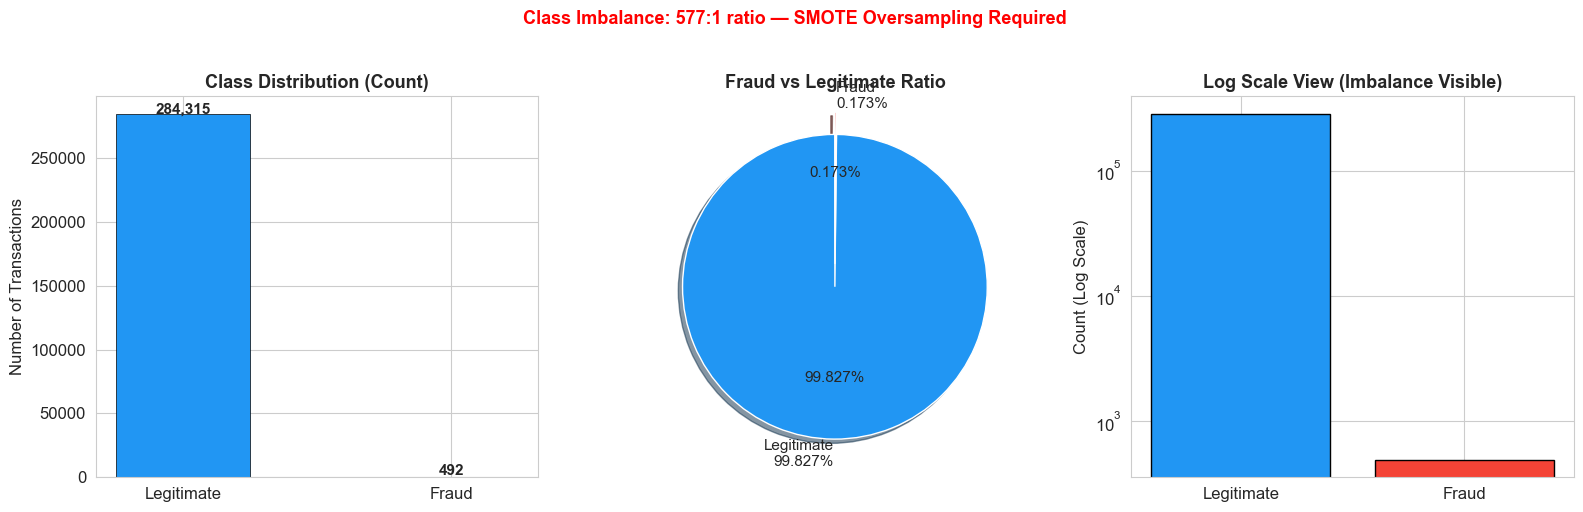

 Saved: results/class_distribution.png


In [8]:
# CELL 8: CLASS DISTRIBUTION

fraud_count = df['Class'].value_counts()
fraud_pct = df['Class'].value_counts(normalize=True) * 100
n_legit = fraud_count[0]
n_fraud = fraud_count[1]
imbalance_ratio = n_legit / n_fraud

print('=== Class Distribution ===')
print(f'  Legitimate Transactions: {n_legit:,}  ({fraud_pct[0]:.3f}%)')
print(f'  Fraudulent Transactions: {n_fraud:,}    ({fraud_pct[1]:.3f}%)')
print(f'  Imbalance Ratio:         {imbalance_ratio:.0f}:1')
print(f'\n  SEVERE IMBALANCE — Standard accuracy is misleading!')
print(f'   A model predicting ALL legitimate gets {fraud_pct[0]:.2f}% accuracy.')
print(f'   We must use Precision, Recall, F1, AUC-ROC instead!')

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

colors = ['#2196F3', '#F44336']

# Bar chart
bars = axes[0].bar(['Legitimate', 'Fraud'], fraud_count.values,
                   color=colors, edgecolor='black', linewidth=0.5, width=0.5)
axes[0].set_title('Class Distribution (Count)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Number of Transactions')
for bar, val in zip(bars, fraud_count.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
                 f'{val:,}', ha='center', fontweight='bold', fontsize=11)

# Pie chart
axes[1].pie(fraud_count.values,
            labels=[f'Legitimate\n{fraud_pct[0]:.3f}%', f'Fraud\n{fraud_pct[1]:.3f}%'],
            colors=colors, autopct='%1.3f%%', startangle=90,
            explode=(0, 0.15), shadow=True, textprops={'fontsize': 11})
axes[1].set_title('Fraud vs Legitimate Ratio', fontsize=13, fontweight='bold')

# Log scale bar
axes[2].bar(['Legitimate', 'Fraud'], fraud_count.values, color=colors, edgecolor='black')
axes[2].set_yscale('log')
axes[2].set_title('Log Scale View (Imbalance Visible)', fontsize=13, fontweight='bold')
axes[2].set_ylabel('Count (Log Scale)')

plt.suptitle(' Class Imbalance: 577:1 ratio — SMOTE Oversampling Required',
             fontsize=13, color='red', fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../results/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print(' Saved: results/class_distribution.png')

=== Transaction Amount Statistics ===
 Metric Legitimate (€) Fraudulent (€)
  Count        284,315            492
   Mean          88.29         122.21
 Median          22.00           9.25
Std Dev         250.11         256.68
    Min           0.00           0.00
    Max       25691.16        2125.87
 25th %           5.65           1.00
 75th %          77.05         105.89


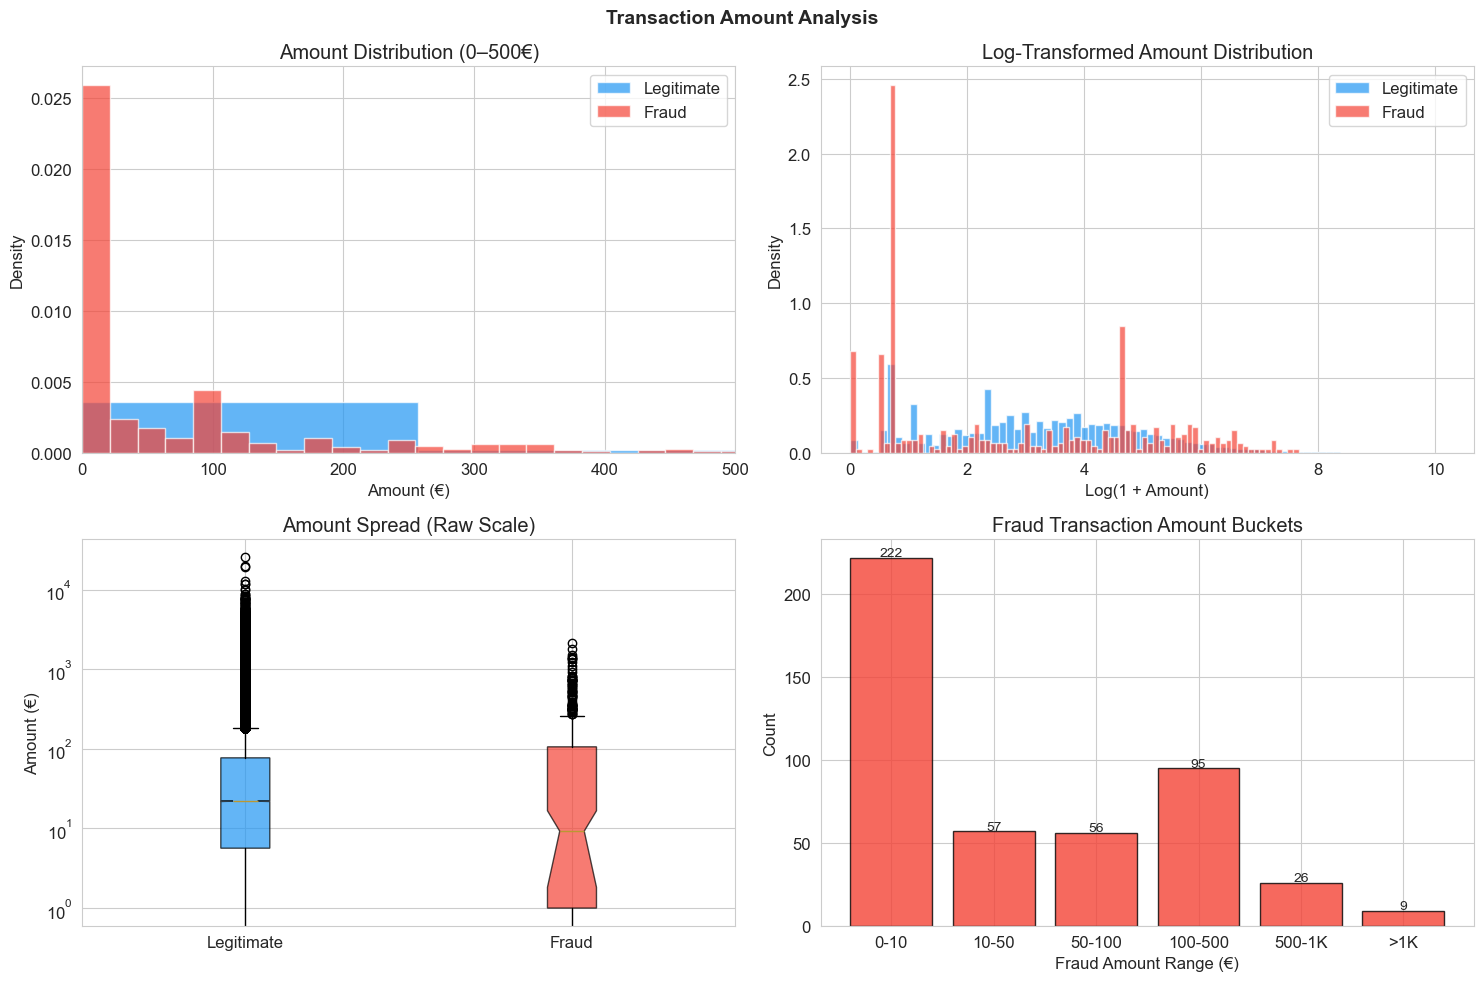


 Key Insight: Fraud transactions tend to be SMALLER amounts
   Fraudsters avoid large amounts to stay under detection thresholds.


In [9]:
# CELL 9: AMOUNT ANALYSIS

fraud_df = df[df['Class'] == 1]
legit_df = df[df['Class'] == 0]

# Statistics
print('=== Transaction Amount Statistics ===')
amount_stats = pd.DataFrame({
    'Metric': ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max', '25th %', '75th %'],
    'Legitimate (€)': [
        f'{len(legit_df):,}',
        f'{legit_df["Amount"].mean():.2f}',
        f'{legit_df["Amount"].median():.2f}',
        f'{legit_df["Amount"].std():.2f}',
        f'{legit_df["Amount"].min():.2f}',
        f'{legit_df["Amount"].max():.2f}',
        f'{legit_df["Amount"].quantile(0.25):.2f}',
        f'{legit_df["Amount"].quantile(0.75):.2f}'
    ],
    'Fraudulent (€)': [
        f'{len(fraud_df):,}',
        f'{fraud_df["Amount"].mean():.2f}',
        f'{fraud_df["Amount"].median():.2f}',
        f'{fraud_df["Amount"].std():.2f}',
        f'{fraud_df["Amount"].min():.2f}',
        f'{fraud_df["Amount"].max():.2f}',
        f'{fraud_df["Amount"].quantile(0.25):.2f}',
        f'{fraud_df["Amount"].quantile(0.75):.2f}'
    ]
})
print(amount_stats.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution histogram
axes[0,0].hist(legit_df['Amount'], bins=100, alpha=0.7, color='#2196F3',
               label='Legitimate', density=True)
axes[0,0].hist(fraud_df['Amount'], bins=100, alpha=0.7, color='#F44336',
               label='Fraud', density=True)
axes[0,0].set_xlim(0, 500)
axes[0,0].set_xlabel('Amount (€)')
axes[0,0].set_ylabel('Density')
axes[0,0].set_title('Amount Distribution (0–500€)')
axes[0,0].legend()

# Log scale
axes[0,1].hist(np.log1p(legit_df['Amount']), bins=80, alpha=0.7,
               color='#2196F3', label='Legitimate', density=True)
axes[0,1].hist(np.log1p(fraud_df['Amount']), bins=80, alpha=0.7,
               color='#F44336', label='Fraud', density=True)
axes[0,1].set_xlabel('Log(1 + Amount)')
axes[0,1].set_ylabel('Density')
axes[0,1].set_title('Log-Transformed Amount Distribution')
axes[0,1].legend()

# Boxplot
bp = axes[1,0].boxplot([legit_df['Amount'].values, fraud_df['Amount'].values],
                        labels=['Legitimate', 'Fraud'],
                        patch_artist=True, notch=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1,0].set_ylabel('Amount (€)')
axes[1,0].set_title('Amount Spread (Raw Scale)')
axes[1,0].set_yscale('log')

# Fraud amount buckets
buckets = pd.cut(fraud_df['Amount'],
                 bins=[0, 10, 50, 100, 500, 1000, 10000],
                 labels=['0-10', '10-50', '50-100', '100-500', '500-1K', '>1K'])
bucket_counts = buckets.value_counts().sort_index()
axes[1,1].bar(bucket_counts.index, bucket_counts.values,
              color='#F44336', edgecolor='black', alpha=0.8)
axes[1,1].set_xlabel('Fraud Amount Range (€)')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Fraud Transaction Amount Buckets')
for i, v in enumerate(bucket_counts.values):
    axes[1,1].text(i, v + 1, str(v), ha='center', fontsize=10)

plt.suptitle('Transaction Amount Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/amount_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print('\n Key Insight: Fraud transactions tend to be SMALLER amounts')
print(f'   Fraudsters avoid large amounts to stay under detection thresholds.')

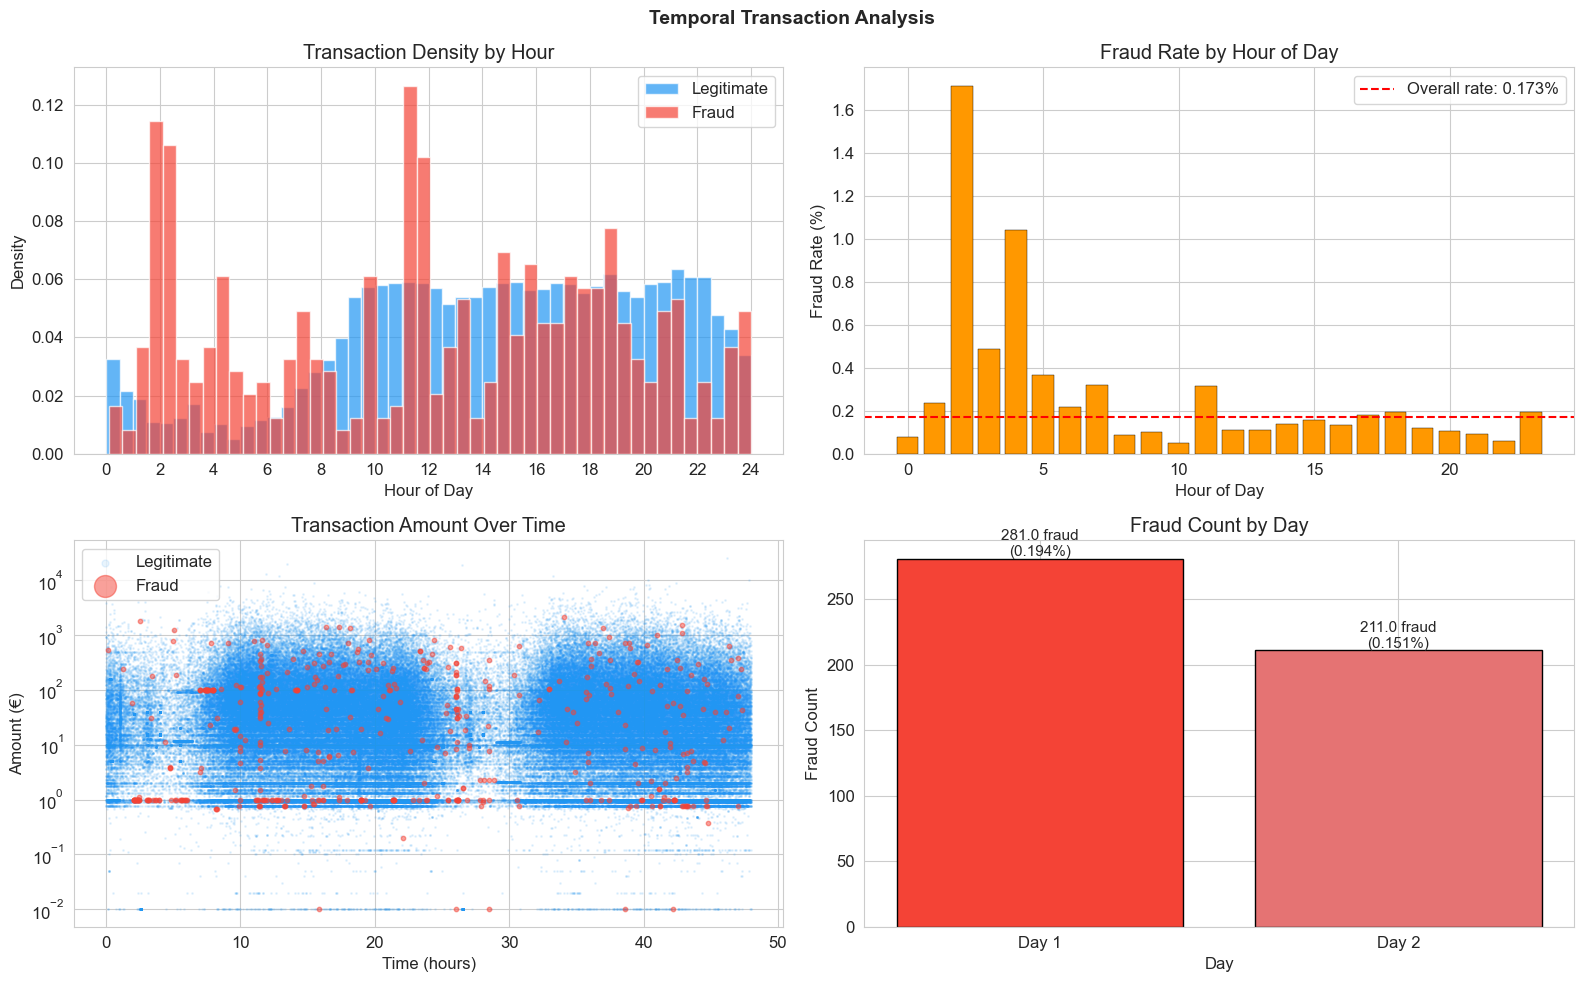


 Key Insight: Highest fraud rate at hour 2:00
   Off-peak hours (1AM–4AM) show elevated fraud risk.


In [13]:
# CELL 10: TEMPORAL ANALYSIS

df_temp = df.copy()
df_temp['Hour'] = (df_temp['Time'] / 3600) % 24
df_temp['Day'] = (df_temp['Time'] / 86400).astype(int) + 1  # Day 1 or Day 2

fraud_temp = df_temp[df_temp['Class'] == 1]
legit_temp = df_temp[df_temp['Class'] == 0]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Hourly transaction density
axes[0,0].hist(legit_temp['Hour'], bins=48, alpha=0.7, color='#2196F3',
               label='Legitimate', density=True)
axes[0,0].hist(fraud_temp['Hour'], bins=48, alpha=0.7, color='#F44336',
               label='Fraud', density=True)
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Density')
axes[0,0].set_title('Transaction Density by Hour')
axes[0,0].legend()
axes[0,0].set_xticks(range(0, 25, 2))

# Fraud rate by hour
df_temp['Hour_bin'] = df_temp['Hour'].astype(int)
fraud_rate_by_hour = df_temp.groupby('Hour_bin')['Class'].mean() * 100
fraud_count_by_hour = df_temp.groupby('Hour_bin')['Class'].sum()
axes[0,1].bar(fraud_rate_by_hour.index, fraud_rate_by_hour.values,
              color='#FF9800', edgecolor='black', linewidth=0.3)
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('Fraud Rate (%)')
axes[0,1].set_title('Fraud Rate by Hour of Day')
axes[0,1].axhline(y=df_temp['Class'].mean()*100, color='red',
                  linestyle='--', label=f'Overall rate: {df_temp["Class"].mean()*100:.3f}%')
axes[0,1].legend()

# Raw transaction volume over time
axes[1,0].scatter(legit_temp['Time']/3600, legit_temp['Amount'],
                  alpha=0.1, s=1, color='#2196F3', label='Legitimate')
axes[1,0].scatter(fraud_temp['Time']/3600, fraud_temp['Amount'],
                  alpha=0.5, s=10, color='#F44336', label='Fraud')
axes[1,0].set_xlabel('Time (hours)')
axes[1,0].set_ylabel('Amount (€)')
axes[1,0].set_title('Transaction Amount Over Time')
axes[1,0].legend(markerscale=5)
axes[1,0].set_yscale('log')

# Fraud by day
fraud_by_day = df_temp.groupby('Day')['Class'].agg(['sum', 'count', 'mean'])
fraud_by_day.columns = ['Fraud Count', 'Total', 'Fraud Rate']
axes[1,1].bar(fraud_by_day.index, fraud_by_day['Fraud Count'],
              color=['#F44336', '#E57373'], edgecolor='black')
axes[1,1].set_xlabel('Day')
axes[1,1].set_ylabel('Fraud Count')
axes[1,1].set_title('Fraud Count by Day')
axes[1,1].set_xticks([1, 2])
axes[1,1].set_xticklabels(['Day 1', 'Day 2'])
for day, row in fraud_by_day.iterrows():
    axes[1,1].text(day, row['Fraud Count'] + 2,
                   f"{row['Fraud Count']} fraud\n({row['Fraud Rate']*100:.3f}%)",
                   ha='center', fontsize=11)

plt.suptitle('Temporal Transaction Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/time_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

peak_fraud_hour = fraud_rate_by_hour.idxmax()
print(f'\n Key Insight: Highest fraud rate at hour {peak_fraud_hour}:00')
print(f'   Off-peak hours (1AM–4AM) show elevated fraud risk.')

=== Feature Correlation with Class (Fraud=1) ===

Top 5 POSITIVELY correlated (more → more fraud):
V19    0.0348
V21    0.0404
V2     0.0913
V4     0.1334
V11    0.1549
Name: Class, dtype: float64

Top 5 NEGATIVELY correlated (higher → less fraud):
V17   -0.3265
V14   -0.3025
V12   -0.2606
V10   -0.2169
V16   -0.1965
Name: Class, dtype: float64


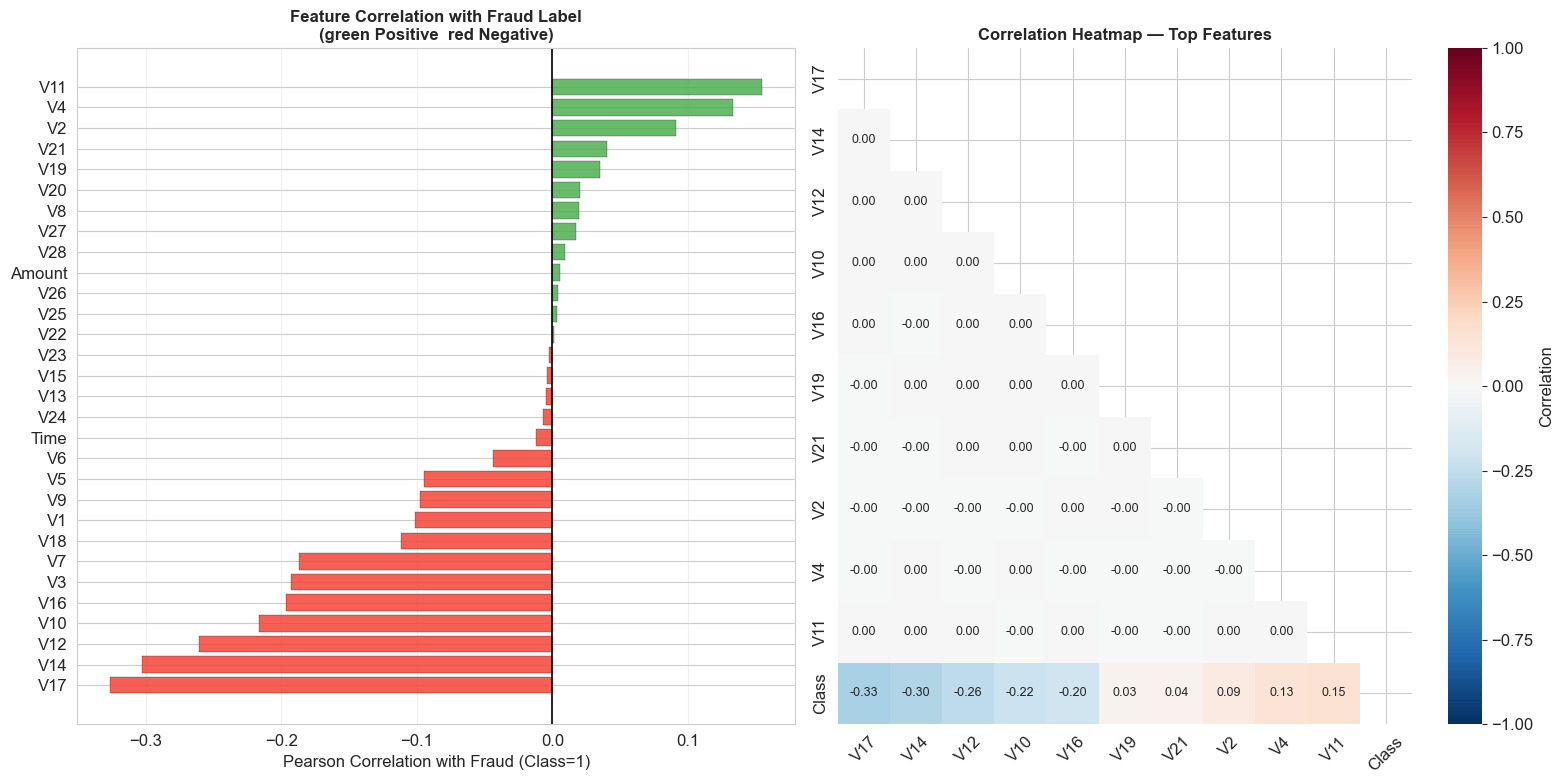

 Saved: results/feature_correlation.png


In [12]:
# CELL 11: FEATURE CORRELATION WITH TARGET

df_corr = df.copy()

corr_with_class = df_corr.corr()['Class'].drop('Class').sort_values()

print('=== Feature Correlation with Class (Fraud=1) ===')
print(f'\nTop 5 POSITIVELY correlated (more → more fraud):')
print(corr_with_class.tail(5).round(4))
print(f'\nTop 5 NEGATIVELY correlated (higher → less fraud):')
print(corr_with_class.head(5).round(4))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Bar chart of correlations
colors_corr = ['#F44336' if x < 0 else '#4CAF50' for x in corr_with_class.values]
axes[0].barh(corr_with_class.index, corr_with_class.values,
             color=colors_corr, edgecolor='black', linewidth=0.2, alpha=0.85)
axes[0].axvline(x=0, color='black', linewidth=1.2)
axes[0].set_xlabel('Pearson Correlation with Fraud (Class=1)')
axes[0].set_title('Feature Correlation with Fraud Label\n(green Positive  red Negative)',
                  fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Heatmap of top correlated features
top_pos = corr_with_class.tail(5).index.tolist()
top_neg = corr_with_class.head(5).index.tolist()
top_features_corr = top_neg + top_pos + ['Class']
corr_matrix = df_corr[top_features_corr].corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='RdBu_r', center=0, vmin=-1, vmax=1,
            ax=axes[1], cbar_kws={'label': 'Correlation'},
            annot_kws={'size': 9})
axes[1].set_title('Correlation Heatmap — Top Features', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../results/feature_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

print(' Saved: results/feature_correlation.png')

Top 8 most discriminative features: ['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11']


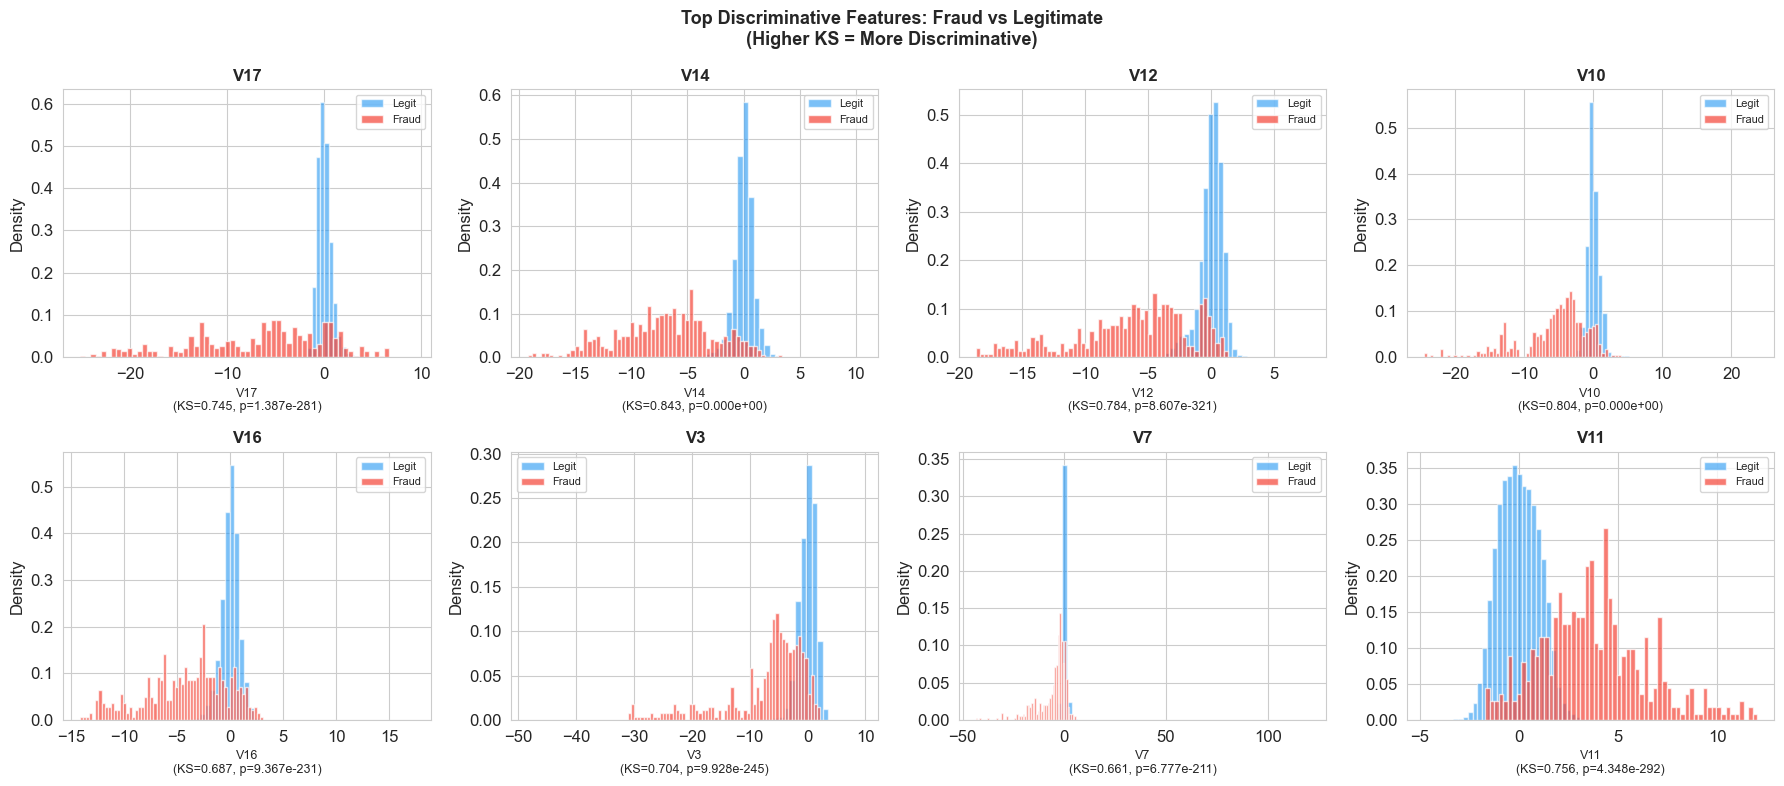

 KS statistic measures how different distributions are (1=completely different)


In [15]:
#CELL 12: TOP FEATURE DISTRIBUTIONS — FRAUD vs LEGITIMATE

top_features = corr_with_class.abs().sort_values(ascending=False).head(8).index.tolist()
print(f'Top 8 most discriminative features: {top_features}')

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    axes[i].hist(legit_df[feature], bins=60, alpha=0.6,
                 color='#2196F3', label='Legit', density=True)
    axes[i].hist(fraud_df[feature], bins=60, alpha=0.7,
                 color='#F44336', label='Fraud', density=True)
    axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[i].legend(fontsize=8)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

    # Compute KS statistic (how different are the distributions?)
    from scipy.stats import ks_2samp
    ks_stat, ks_p = ks_2samp(legit_df[feature].dropna(), fraud_df[feature].dropna())
    axes[i].set_xlabel(f'{feature}\n(KS={ks_stat:.3f}, p={ks_p:.3e})', fontsize=9)

plt.suptitle('Top Discriminative Features: Fraud vs Legitimate\n(Higher KS = More Discriminative)',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/top_features.png', dpi=150, bbox_inches='tight')
plt.show()

print(' KS statistic measures how different distributions are (1=completely different)')

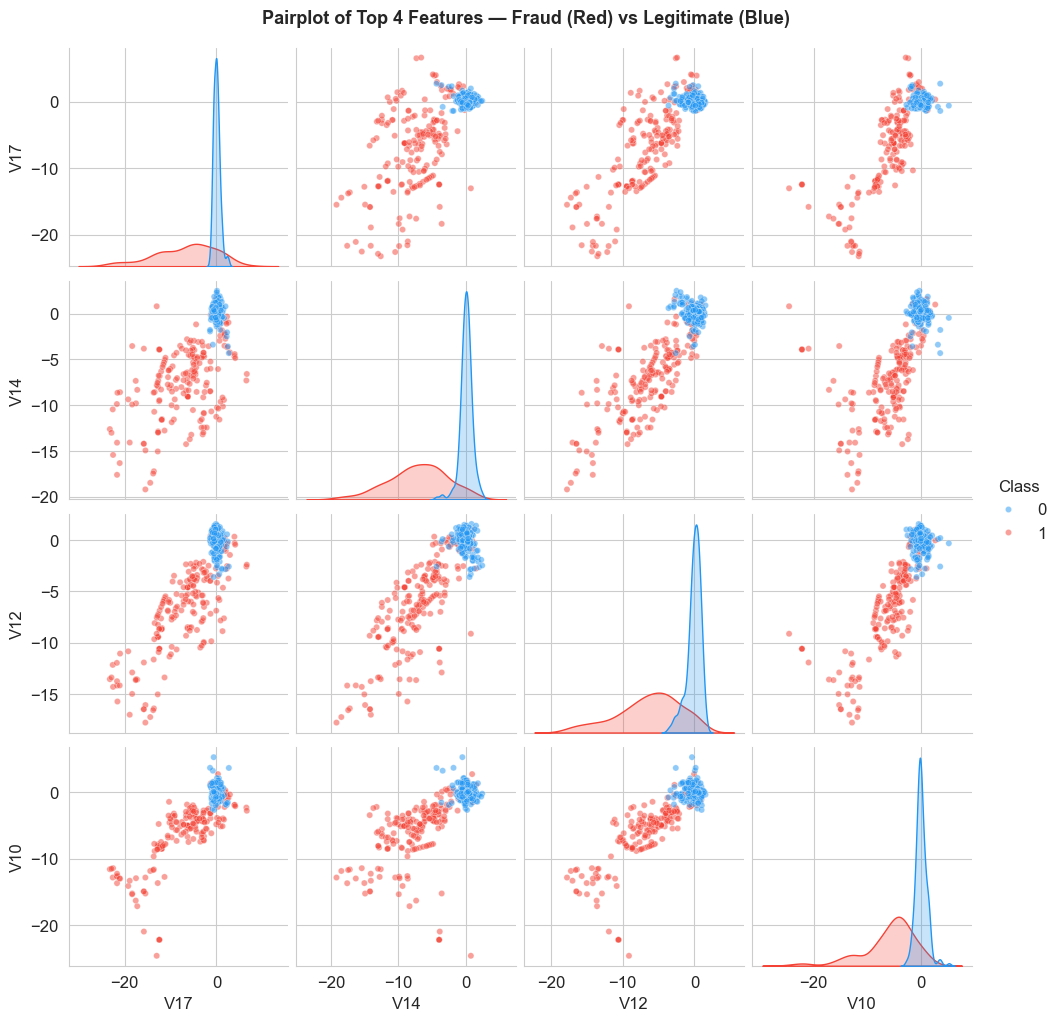

 Saved: results/pairplot.png


In [16]:
# CELL 13: PAIRPLOT OF TOP FEATURES

sample_fraud = fraud_df.sample(min(200, len(fraud_df)), random_state=42)
sample_legit = legit_df.sample(min(200, len(legit_df)), random_state=42)
sample_df = pd.concat([sample_fraud, sample_legit])

top4 = corr_with_class.abs().sort_values(ascending=False).head(4).index.tolist()

g = sns.pairplot(
    sample_df[top4 + ['Class']],
    hue='Class',
    palette={0: '#2196F3', 1: '#F44336'},
    plot_kws={'alpha': 0.5, 's': 20},
    diag_kind='kde'
)
g.fig.suptitle('Pairplot of Top 4 Features — Fraud (Red) vs Legitimate (Blue)',
               y=1.02, fontsize=13, fontweight='bold')
plt.savefig('../results/pairplot.png', dpi=120, bbox_inches='tight')
plt.show()
print(' Saved: results/pairplot.png')

In [18]:
# CELL 14: DATA INVENTORY DOCUMENTATION

print('=' * 65)
print('           DATA INVENTORY LIST (PDF Day 4 Output)')
print('=' * 65)
print(f'''
PRIMARY DATASET:
  Name:         Credit Card Fraud Detection
  Source:       Kaggle / ULB Machine Learning Group
  URL:          https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
  License:      Open Database License (ODbL)
  Format:       CSV
  Size:         ~150 MB
  Records:      284,807 rows
  Features:     31 columns (30 input + 1 target)
  Missing:      None
  Access:       Public — download via Kaggle CLI or web

FEATURE DESCRIPTIONS:
  Time   : Seconds since first transaction (float)
  V1–V28 : PCA-transformed features (anonymized, float)
  Amount : Transaction amount in Euros (float)
  Class  : Target — 0=Legitimate, 1=Fraud (int)

DATA QUALITY SUMMARY:
   No missing values
   No duplicate rows
   No infinite values
   All features numeric
    Class imbalance: 0.17% fraud (492 out of 284,807)
    Amount and Time need StandardScaler normalization
    V1–V28 already PCA-transformed (no additional scaling)

PREPROCESSING NEEDED:
  1. Scale Amount (right-skewed → log transform + StandardScaler)
  2. Encode Time → cyclical (Hour_sin, Hour_cos)
  3. Apply SMOTE to training set for class balance
  4. Stratified train/val/test split
''')
print('=' * 65)

           DATA INVENTORY LIST (PDF Day 4 Output)

PRIMARY DATASET:
  Name:         Credit Card Fraud Detection
  Source:       Kaggle / ULB Machine Learning Group
  URL:          https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
  License:      Open Database License (ODbL)
  Format:       CSV
  Size:         ~150 MB
  Records:      284,807 rows
  Features:     31 columns (30 input + 1 target)
  Missing:      None
  Access:       Public — download via Kaggle CLI or web

FEATURE DESCRIPTIONS:
  Time   : Seconds since first transaction (float)
  V1–V28 : PCA-transformed features (anonymized, float)
  Amount : Transaction amount in Euros (float)
  Class  : Target — 0=Legitimate, 1=Fraud (int)

DATA QUALITY SUMMARY:
   No missing values
   No duplicate rows
   No infinite values
   All features numeric
    Class imbalance: 0.17% fraud (492 out of 284,807)
    Amount and Time need StandardScaler normalization
    V1–V28 already PCA-transformed (no additional scaling)

PREPROCESSING NE

In [21]:
# CELL 15: KPI DEFINITION & BASELINE

print('=' * 65)
print('      SUCCESS METRICS / KPIs (PDF Day 5 Output)')
print('=' * 65)

# Naive baseline: predict everything as legitimate
naive_accuracy = fraud_pct[0] / 100
naive_precision = 0   # predicts no fraud
naive_recall = 0      # catches no fraud

print(f'''
WHY ACCURACY IS WRONG FOR THIS PROBLEM:
  A model that ALWAYS predicts "Legitimate" gets:
   Accuracy = {naive_accuracy*100:.2f}%  (misleadingly high!)
   Recall   = 0%    (catches ZERO fraud!)
   Precision = N/A  (never flags fraud!)

CORRECT METRICS FOR FRAUD DETECTION:
┌─────────────────────┬─────────────┬─────────────────────────────────┐
│ KPI                 │ Target      │ Why It Matters                  │
├─────────────────────┼─────────────┼─────────────────────────────────┤
│ AUC-ROC             │ ≥ 0.95      │ Overall discriminative ability  │
│ Average Precision   │ ≥ 0.70      │ Precision-recall tradeoff       │
│ Recall (Sensitivity)│ ≥ 80%       │ % of actual fraud caught        │
│ Precision           │ ≥ 90%       │ Quality of fraud alerts         │
│ F1-Score            │ ≥ 0.85      │ Balance of precision & recall   │
│ False Positive Rate │ ≤ 0.1%      │ Minimize blocking legit tx      │
│ Inference Latency   │ < 50ms      │ Real-time requirement           │
│ Model Retraining    │ Monthly     │ Adapt to evolving fraud         │
└─────────────────────┴─────────────┴─────────────────────────────────┘

BUSINESS COST MODEL:
   1 False Negative (missed fraud):  Cost = avg fraud loss = ~€88
   1 False Positive (blocked legit): Cost = customer friction = ~€5
   FN is 17.6x more costly than FP → optimize for high Recall!
''')
print('=' * 65)

      SUCCESS METRICS / KPIs (PDF Day 5 Output)

WHY ACCURACY IS WRONG FOR THIS PROBLEM:
  A model that ALWAYS predicts "Legitimate" gets:
   Accuracy = 99.83%  (misleadingly high!)
   Recall   = 0%    (catches ZERO fraud!)
   Precision = N/A  (never flags fraud!)

CORRECT METRICS FOR FRAUD DETECTION:
┌─────────────────────┬─────────────┬─────────────────────────────────┐
│ KPI                 │ Target      │ Why It Matters                  │
├─────────────────────┼─────────────┼─────────────────────────────────┤
│ AUC-ROC             │ ≥ 0.95      │ Overall discriminative ability  │
│ Average Precision   │ ≥ 0.70      │ Precision-recall tradeoff       │
│ Recall (Sensitivity)│ ≥ 80%       │ % of actual fraud caught        │
│ Precision           │ ≥ 90%       │ Quality of fraud alerts         │
│ F1-Score            │ ≥ 0.85      │ Balance of precision & recall   │
│ False Positive Rate │ ≤ 0.1%      │ Minimize blocking legit tx      │
│ Inference Latency   │ < 50ms      │ Real-time r